In [13]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, Activation, Dropout, GaussianNoise
from keras.optimizers import Adam

from itertools import product

In [2]:
batch_size = 128
epochs = 25
num_classes=10

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('training set', x_train.shape)
print('test set', x_test.shape)

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize [0..255]-->[0..1]
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 7s 1us/step
training set (60000, 28, 28)
test set (10000, 28, 28)


In [20]:
def run_model_args(args):
    inp = Input(shape=(784))
    
    x = inp
    
    for _ in range(args["hl"]):
        x = Dense(args["hls"])(x)
        x = Activation(args["activation"])(x)
        
    x = Dense(10)(x)
    output = Activation('softmax')(x)

    model = Model(inp, output)

    #model.summary()
    
    opt=Adam(learning_rate=args["lr"])

    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        validation_data=(x_test, y_test))

    # Evaluate over test
    score = model.evaluate(x_test, y_test, verbose=0)


    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    return score[1]

In [ ]:
params = {"hl": range(1, 4),
          "hls": [2**n for n in range(8, 11)],
          "activation": ["sigmoid", "relu"],
          "lr": [10**-n for n in range(1,5)]}

keys, values = zip(*params.items())
results = {}

for bundle in product(*values):
    d = dict(zip(keys, bundle))
    print(d)
    acc = run_model_args(d)
    results[bundle] = acc

{'hl': 1, 'hls': 256, 'activation': 'sigmoid', 'lr': 0.1}
Test loss: 0.2839062213897705
Test accuracy: 0.9368000030517578
{'hl': 1, 'hls': 256, 'activation': 'sigmoid', 'lr': 0.01}
Test loss: 0.1251593679189682
Test accuracy: 0.9747999906539917
{'hl': 1, 'hls': 256, 'activation': 'sigmoid', 'lr': 0.001}
Test loss: 0.06537221372127533
Test accuracy: 0.9807999730110168
{'hl': 1, 'hls': 256, 'activation': 'sigmoid', 'lr': 0.0001}
Test loss: 0.17698323726654053
Test accuracy: 0.9480000138282776
{'hl': 1, 'hls': 256, 'activation': 'relu', 'lr': 0.1}
Test loss: 1.1824473142623901
Test accuracy: 0.8091999888420105
{'hl': 1, 'hls': 256, 'activation': 'relu', 'lr': 0.01}
Test loss: 0.3273589015007019
Test accuracy: 0.9757000207901001
{'hl': 1, 'hls': 256, 'activation': 'relu', 'lr': 0.001}
Test loss: 0.07500723004341125
Test accuracy: 0.9818000197410583
{'hl': 1, 'hls': 256, 'activation': 'relu', 'lr': 0.0001}
Test loss: 0.08359457552433014
Test accuracy: 0.9750999808311462
{'hl': 1, 'hls': 512

In [9]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [10]:
import matplotlib.pyplot as plt

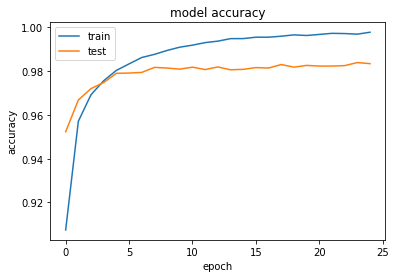

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()